<a href="https://colab.research.google.com/github/Ram04420/TensorFlow/blob/master/CNN_with_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [0]:
print(tf.__version__)

2.2.0-rc3


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
x_train.max()

255

In [0]:
x_train = x_train/255.0

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_test.shape

(10000, 32, 32, 3)

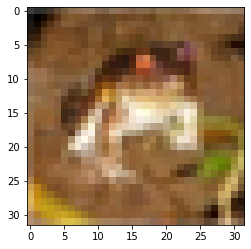

In [0]:
plt.imshow(x_train[0])

**Build CNN**

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding= 'same', activation='relu', input_shape = [32,32,3]))
model.add(MaxPool2D(pool_size=(2,2), strides= 2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
______________________________________________

In [0]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['sparse_categorical_accuracy'])

In [0]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
5000/5000 [==============================] - 78s 16ms/step - loss: 1.4647 - sparse_categorical_accuracy: 0.4754 - val_loss: 238.7048 - val_sparse_categorical_accuracy: 0.3699
Epoch 2/10
5000/5000 [==============================] - 80s 16ms/step - loss: 1.2214 - sparse_categorical_accuracy: 0.5645 - val_loss: 199.8837 - val_sparse_categorical_accuracy: 0.3802
Epoch 3/10
5000/5000 [==============================] - 82s 16ms/step - loss: 1.1167 - sparse_categorical_accuracy: 0.6050 - val_loss: 255.7532 - val_sparse_categorical_accuracy: 0.3921
Epoch 4/10
5000/5000 [==============================] - 78s 16ms/step - loss: 1.0471 - sparse_categorical_accuracy: 0.6301 - val_loss: 228.7137 - val_sparse_categorical_accuracy: 0.4240
Epoch 5/10
5000/5000 [==============================] - 77s 15ms/step - loss: 0.9939 - sparse_categorical_accuracy: 0.6475 - val_loss: 230.3870 - val_sparse_categorical_accuracy: 0.4219
Epoch 6/10
5000/5000 [==============================] - 77s 15ms/step 

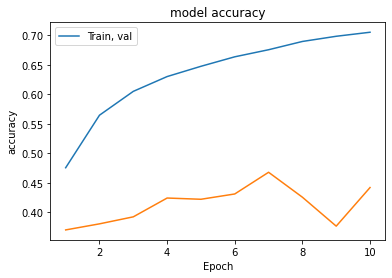

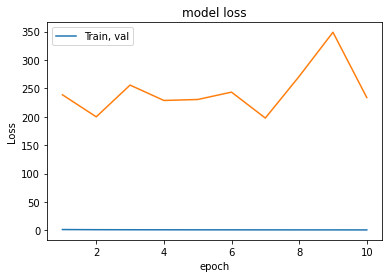

In [0]:
#plot model training & model validation accuracy values
epoch_range = range(1,11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train, val'], loc = 'upper left')
plt.show()

#plot model taining & model loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train, val'], loc = 'upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
y_pred

array([3, 8, 0, ..., 5, 1, 7])

In [0]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat = confusion_matrix(y_pred, y_test)

In [0]:
mat

array([[766,  68, 322, 168, 194,  92, 159,  44, 247,  74],
       [ 35, 734,  23,  33,  23,  19,  92,  33,  60, 293],
       [ 29,   3, 213,  44,  92,  43,  57,  44,   4,   8],
       [  6,   9,  22, 111,  29,  41,  67,   9,   5,   6],
       [  8,   0,  29,  19, 121,  17,  24,  23,   1,   4],
       [ 24,  17, 236, 429, 288, 645, 254, 171,  36,  26],
       [  0,   2,   7,   3,   9,   3, 161,   0,   0,   1],
       [ 13,   4,  64,  80, 149,  74,  49, 607,   9,  29],
       [ 89, 104,  58,  69,  81,  44,  81,  47, 612, 111],
       [ 30,  59,  26,  44,  14,  22,  56,  22,  26, 448]])

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f71e5b2cc50>)

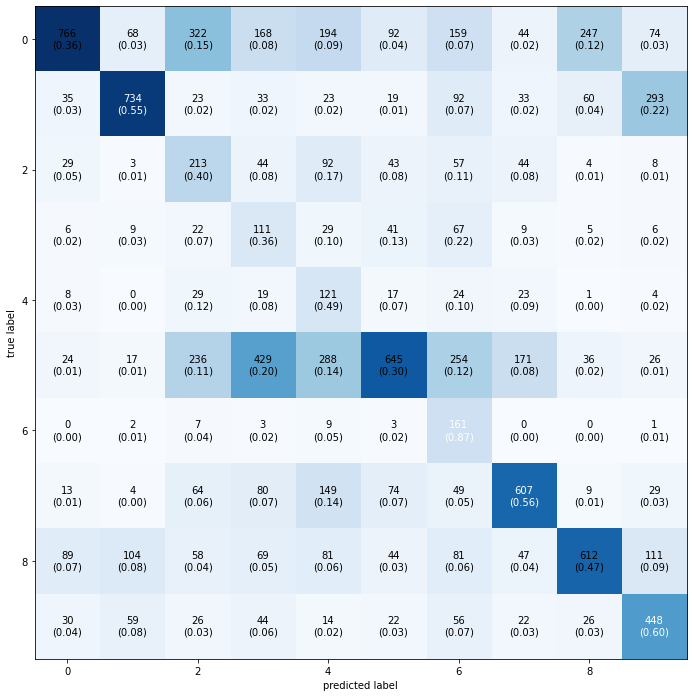

In [0]:
plot_confusion_matrix(mat, figsize=(12,12), show_normed=True)